# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kyaikkami
Processing Record 2 of Set 1 | smithers
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | khanty-mansiysk
Processing Record 9 of Set 1 | palmer
Processing Record 10 of Set 1 | bhanvad
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | hinatuan
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | constantia
Processing Record 16 of Set 1 | hasaki
Processing Record 17 of Set 1 | road town
Processing Record 18 of Set 1 | essaouira
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | ghadamis
Processing Record 22 of Set 

Processing Record 40 of Set 4 | macae
Processing Record 41 of Set 4 | boguchany
Processing Record 42 of Set 4 | san patricio
Processing Record 43 of Set 4 | rancho palos verdes
Processing Record 44 of Set 4 | calama
Processing Record 45 of Set 4 | hanting
Processing Record 46 of Set 4 | kolonia
Processing Record 47 of Set 4 | thunder bay
Processing Record 48 of Set 4 | utrik
Processing Record 49 of Set 4 | vilyuchinsk
Processing Record 0 of Set 5 | west end
Processing Record 1 of Set 5 | al hazm
Processing Record 2 of Set 5 | hwange
Processing Record 3 of Set 5 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 4 of Set 5 | lebu
Processing Record 5 of Set 5 | kailua-kona
Processing Record 6 of Set 5 | tikhvin
Processing Record 7 of Set 5 | lame
Processing Record 8 of Set 5 | codrington
Processing Record 9 of Set 5 | sumbawa besar
Processing Record 10 of Set 5 | olinda
Processing Record 11 of Set 5 | horazdovice
Processing Record 12 of Set 5 | geraldton
Processing Record 13 of

Processing Record 34 of Set 8 | keflavik
Processing Record 35 of Set 8 | anadyr
Processing Record 36 of Set 8 | telsiai
Processing Record 37 of Set 8 | aquin
Processing Record 38 of Set 8 | happy valley-goose bay
Processing Record 39 of Set 8 | nema
Processing Record 40 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 41 of Set 8 | nogliki
Processing Record 42 of Set 8 | brejo
Processing Record 43 of Set 8 | guanambi
Processing Record 44 of Set 8 | olyokminsk
Processing Record 45 of Set 8 | novyy urgal
Processing Record 46 of Set 8 | luza
Processing Record 47 of Set 8 | saint croix
Processing Record 48 of Set 8 | cannonvale
Processing Record 49 of Set 8 | fort st. john
Processing Record 0 of Set 9 | suva
Processing Record 1 of Set 9 | bereznik
Processing Record 2 of Set 9 | almazan
Processing Record 3 of Set 9 | banda aceh
Processing Record 4 of Set 9 | forster
Processing Record 5 of Set 9 | funafuti
Processing Record 6 of Set 9 | mccook
Processing Record 7 of 

Processing Record 21 of Set 12 | bosobolo
Processing Record 22 of Set 12 | batticaloa
Processing Record 23 of Set 12 | coahuayana de hidalgo
Processing Record 24 of Set 12 | arauquita
Processing Record 25 of Set 12 | northam
Processing Record 26 of Set 12 | pader palwo
Processing Record 27 of Set 12 | karratha
Processing Record 28 of Set 12 | tsiombe
Processing Record 29 of Set 12 | cockburn town
Processing Record 30 of Set 12 | roslavl'
Processing Record 31 of Set 12 | lembar
City not found. Skipping...
Processing Record 32 of Set 12 | igarka
Processing Record 33 of Set 12 | wongsorejo
Processing Record 34 of Set 12 | dwarka
Processing Record 35 of Set 12 | le port
Processing Record 36 of Set 12 | kuanda
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kyaikkami,16.0800,97.5675,28.61,63,5,0.72,MM,1702011258
1,smithers,54.7804,-127.1743,-4.82,86,100,2.06,CA,1702011258
2,port-aux-francais,-49.3500,70.2167,4.16,85,94,15.22,TF,1702011258
3,port elizabeth,-33.9180,25.5701,19.50,88,40,9.26,ZA,1702011258
4,margaret river,-33.9500,115.0667,19.53,51,19,7.75,AU,1702011259


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")


In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kyaikkami,16.0800,97.5675,28.61,63,5,0.72,MM,1702011258
1,smithers,54.7804,-127.1743,-4.82,86,100,2.06,CA,1702011258
2,port-aux-francais,-49.3500,70.2167,4.16,85,94,15.22,TF,1702011258
3,port elizabeth,-33.9180,25.5701,19.50,88,40,9.26,ZA,1702011258
4,margaret river,-33.9500,115.0667,19.53,51,19,7.75,AU,1702011259


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

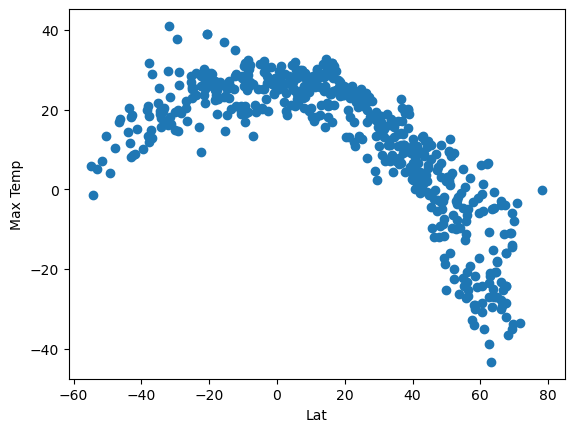

In [12]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Lat")
plt.ylabel("Max Temp")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

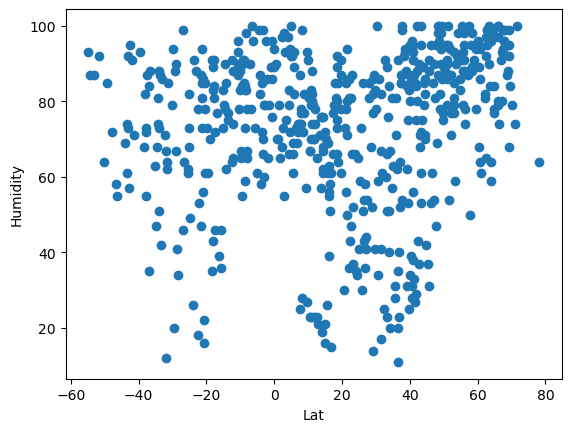

In [13]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Lat")
plt.ylabel("Humidity")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

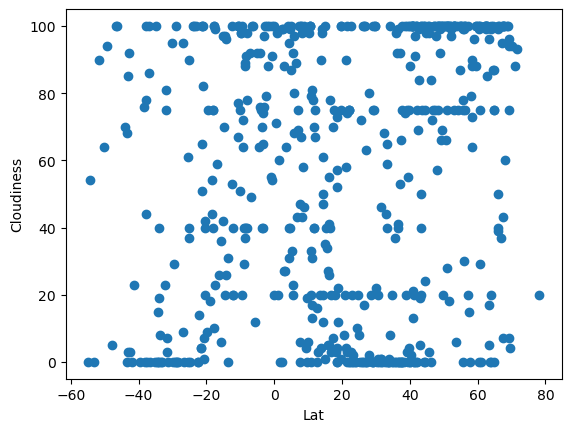

In [14]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

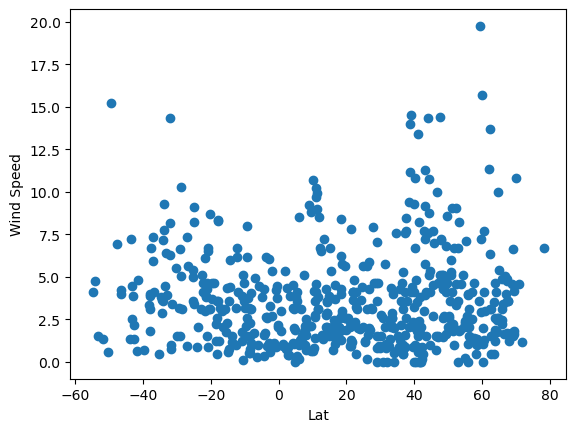

In [15]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_reg (x, y):
    x_values = city_data_df["x"]
    y_values = city_data_df["y"]   
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r-value is: {r[0]}")
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=15, color="red")
    plt.scatter(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kyaikkami,16.0800,97.5675,28.61,63,5,0.72,MM,1702011258
1,smithers,54.7804,-127.1743,-4.82,86,100,2.06,CA,1702011258
5,iqaluit,63.7506,-68.5145,-15.15,84,0,2.57,CA,1702011259
6,khanty-mansiysk,61.0042,69.0019,-34.94,61,0,3.00,RU,1702011259
7,palmer,42.1584,-72.3287,-0.51,80,100,0.00,US,1702011259


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,4.16,85,94,15.22,TF,1702011258
3,port elizabeth,-33.9180,25.5701,19.50,88,40,9.26,ZA,1702011258
4,margaret river,-33.9500,115.0667,19.53,51,19,7.75,AU,1702011259
9,adamstown,-25.0660,-130.1015,22.79,82,90,3.43,PN,1702011259
18,papatowai,-46.5619,169.4708,16.98,58,100,3.97,NZ,1702011261


###  Temperature vs. Latitude Linear Regression Plot

In [157]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.show()

KeyError: 'x'

In [158]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.show()

KeyError: 'x'

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE